In [13]:
import sys
import os
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split

current_dir = os.getcwd()
miRNetClassifier_path = os.path.abspath(os.path.join(current_dir, '..', 'RNACOREX'))
sys.path.append(miRNetClassifier_path)

import miRNetClassifier

In [14]:
csv_path = os.path.abspath(os.path.join(current_dir, '..', 'RNACOREX', 'SampleData', 'SampleDataBRCA.csv'))

data_brca = pd.read_csv(csv_path, sep = ',', index_col = 0)

# Select expression data (X) and the class (y)

X = data_brca.drop('classvalues', axis = 1)
y = data_brca['classvalues']

# Split the dataset in train and test.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

INICIALIZANDO MOTORES...


INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'tag', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'havana_transcript', 'exon_number', 'exon_id', 'hgnc_id', 'havana_gene', 'ont', 'protein_id', 'ccdsid', 'artif_dupl']


INICIALIZANDO GRAFO...


100%|██████████| 14337075/14337075 [14:58<00:00, 15963.97it/s]



GRAPH INITIALIZED
NUMBER OF NODES:  600
NUMBER OF EDGES:  5468 

INICIALIZANDO GRAFO...


100%|██████████| 25231980/25231980 [19:06<00:00, 22010.42it/s]



GRAPH INITIALIZED
NUMBER OF NODES:  600
NUMBER OF EDGES:  14371 

INICIALIZANDO GRAFO...


100%|██████████| 957040/957040 [00:32<00:00, 29793.38it/s]



GRAPH INITIALIZED
NUMBER OF NODES:  600
NUMBER OF EDGES:  118 


MODEL INITIALIZED
MicroRNAs:  286
Genes:  314
Connections:  4433

CALCULATING FUNCTIONAL MUTUAL INFORMATION...


100%|██████████| 4433/4433 [02:03<00:00, 35.96it/s]


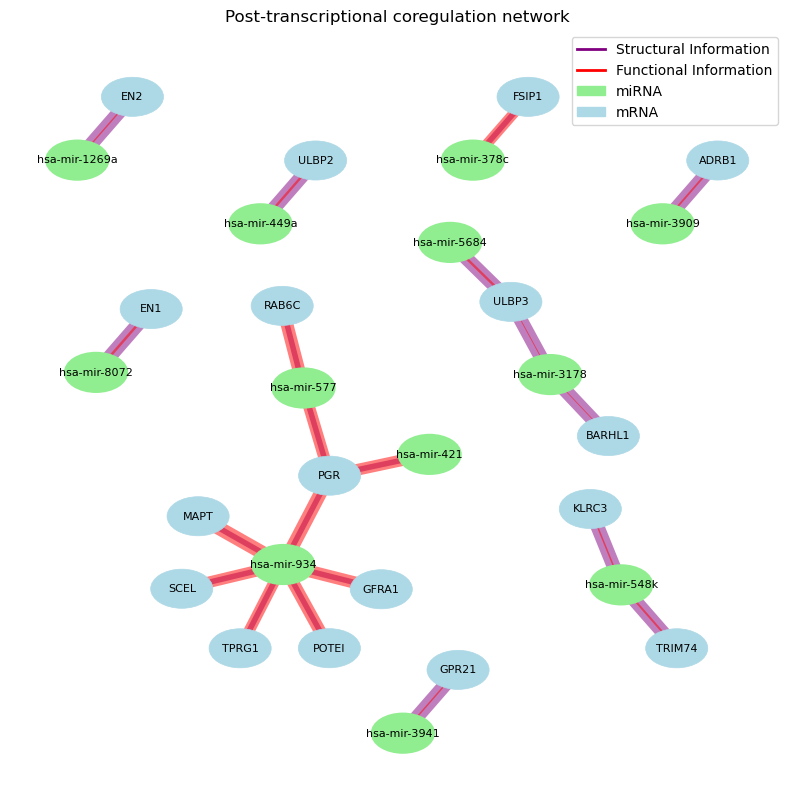

In [15]:
# Initialize estimator with default parameters (precision = 10, n_con = 20)

mrnc = miRNetClassifier.MRNC()

mrnc.fit(X_train, y_train)

mrnc.get_network()

In [ ]:
# Show the structural information.

print(mrnc.structural_information_)

# Show the functional information.

print(mrnc.functional_information_)

# The included micros in the CLG model.

print(mrnc.micros_)

# The included genes in the CLG model.

print(mrnc.genes_)

# The ordered list of interactions with their scores.

print(mrnc.connections_)

# The parameters of the model.

print(mrnc.clgc_)

In [ ]:
# Fit the model

mrnc.predict(X_test)

# Obtain the parameters of the model

mrnc.predict_proba(X_test)

# Score

mrnc.score(X_test, y_test)

In [ ]:
# Initialize estimator with default parameters (precision = 10, n_con = 20)

mrnc = miRNetClassifier.MRNC()

# Initialize model and calculate structural information

mrnc.initialize_model(X_train, y_train)

# Calculate functional information. compute_functional() allows to use different X_train and y_train than the ones used for initializing the model.
# This permits, for example, fitting models with different train and test sets without having to initialize the model again.
# The used X_train and y_train sets should have the same variables (microRNA and mRNA) as the ones used in initialize_model().

mrnc.compute_functional()

# Fit the model

mrnc.fit_only()

# Get the network

mrnc.get_network()

In [ ]:
# Search for optimal structure with personalized train and test sets.

mrnc.structure_search(X_train, y_train, X_test, y_test, 100)

# Use only personalized test sets.

mrnc.structure_search(X_test, y_test, 100)

# Use default train sets and no test set.

mrnc.structure_search(100)

print(mrnc.structure_metrics_)